In [37]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
from scipy.optimize import curve_fit
import datetime

In [38]:
def readFile(filename):
    timeTickFirst, timeTickLast, x, ion1, ion1_raw, ion1_bottom, ion1_top, ion2, ion2_raw, ion2_bottom, ion2_top\
      = np.loadtxt(filename, comments='#', delimiter='\t', converters=None, skiprows=0,unpack=True, encoding='latin1')
    return x, ion1

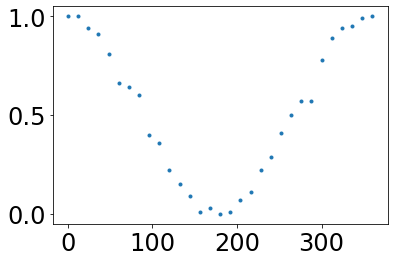

In [39]:
theta, prob = readFile('ramsey_counter_prop_rfsoc_027')
plt.plot(theta, prob, '.')

In [40]:
from scipy.optimize import curve_fit
def Ramsey_phase_scan(theta, A, phi, B):
    theta_radian = theta/180*np.pi
    return A*np.cos(theta_radian+phi)/2+B

[1.0057758  0.03783592 0.50205115]
0.0048270947251113205


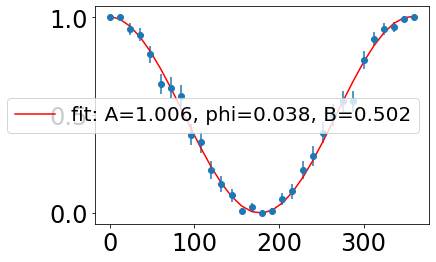

In [41]:
xdata = theta
ydata = prob
guess = np.array([1, 0.01, 0.5])
popt, pcov = curve_fit(Ramsey_phase_scan, xdata, ydata, guess, sigma=np.sqrt(ydata*(1-ydata)/100)+0.005)
plt.plot(xdata, Ramsey_phase_scan(xdata, *popt), 'r-',
     label='fit: A=%5.3f, phi=%5.3f, B=%5.3f' % tuple(popt))
plt.errorbar(xdata, ydata, yerr=np.sqrt(ydata*(1-ydata)/100)+0.005 ,ls='',marker='o')
plt.legend()
print(popt)
print(np.sqrt(np.diag(pcov)[0]))

# Shield Open

In [42]:
import pandas as pd
df_open = pd.read_excel('ShieldOpen.xlsx')
df_open

filename  wait time (ms)
0   ramsey_counter_prop_rfsoc_027             0.0
1   ramsey_counter_prop_rfsoc_029             0.5
2   ramsey_counter_prop_rfsoc_028             1.0
3   ramsey_counter_prop_rfsoc_032             1.5
4   ramsey_counter_prop_rfsoc_033             2.0
5   ramsey_counter_prop_rfsoc_034             2.5
6   ramsey_counter_prop_rfsoc_035             3.0
7   ramsey_counter_prop_rfsoc_036             3.5
8   ramsey_counter_prop_rfsoc_037             4.0
9   ramsey_counter_prop_rfsoc_038             4.5
10  ramsey_counter_prop_rfsoc_039             5.0

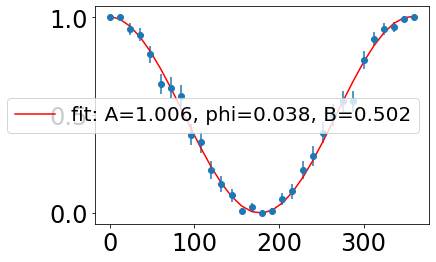

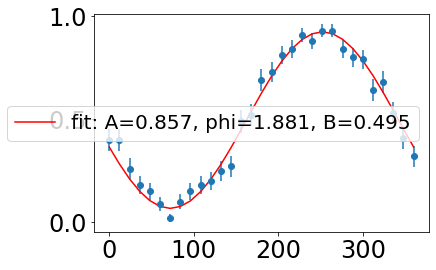

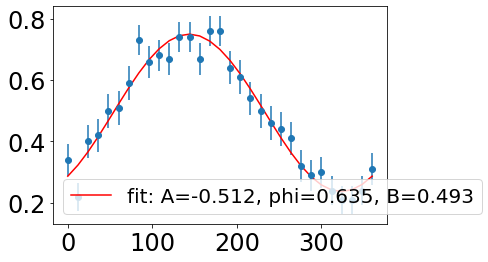

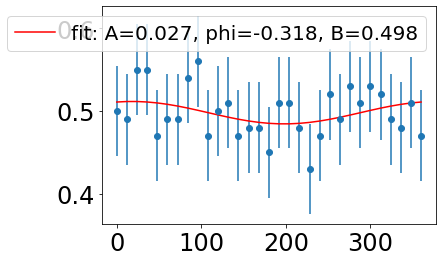

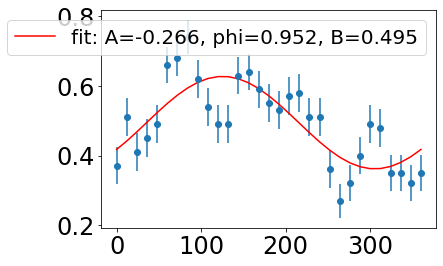

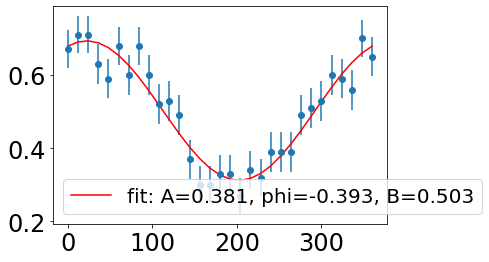

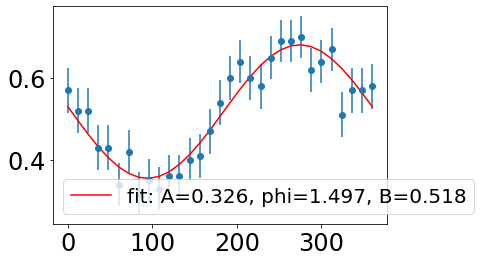

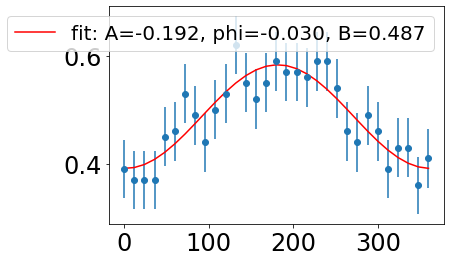

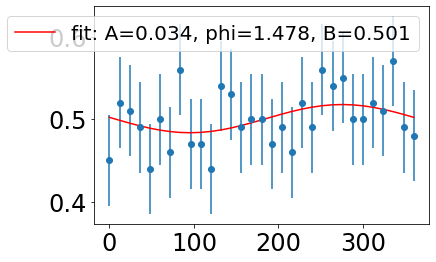

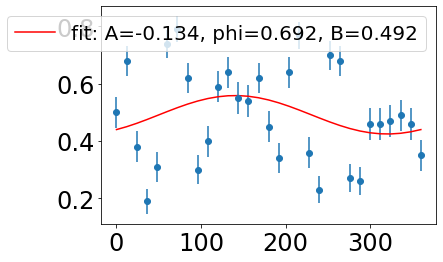

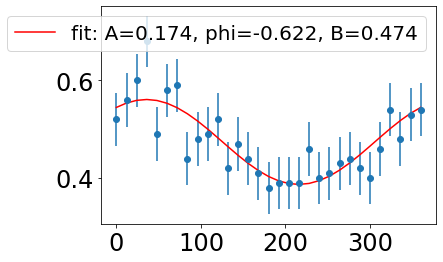

In [43]:
Contrast_open = []
Contrast_err_open = []
for i in range(len(df_open)):
    xdata, ydata = readFile(df_open['filename'][i])
    guess = np.array([1, 0.01, 0.5])
    popt, pcov = curve_fit(Ramsey_phase_scan, xdata, ydata, guess, sigma=np.sqrt(ydata*(1-ydata)/100)+0.005)
    plt.plot(xdata, Ramsey_phase_scan(xdata, *popt), 'r-',
         label='fit: A=%5.3f, phi=%5.3f, B=%5.3f' % tuple(popt))
    plt.errorbar(xdata, ydata, yerr=np.sqrt(ydata*(1-ydata)/100)+0.005 ,ls='',marker='o')
    plt.legend()
    plt.show()
    Contrast_open.append(abs(popt[0]))
    Contrast_err_open.append(np.sqrt(np.diag(pcov)[0]))

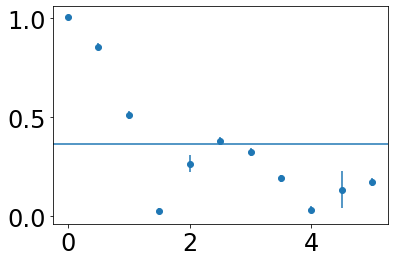

In [44]:
wait_time_open = [float(df_open['wait time (ms)'][i]) for i in range(len(df_open))]
plt.errorbar(wait_time_open, Contrast_open, yerr=Contrast_err_open,ls='',marker='o')
plt.axhline(y = 1/np.exp(1))

# Shield closed

In [45]:
import pandas as pd
df_closed = pd.read_excel('ShieldClosed.xlsx')
df_closed 

filename  wait time (ms)
0   ramsey_counter_prop_rfsoc_043               1
1   ramsey_counter_prop_rfsoc_044               5
2   ramsey_counter_prop_rfsoc_045              10
3   ramsey_counter_prop_rfsoc_046              15
4   ramsey_counter_prop_rfsoc_047              20
5   ramsey_counter_prop_rfsoc_048              30
6   ramsey_counter_prop_rfsoc_049              40
7   ramsey_counter_prop_rfsoc_050              50
8   ramsey_counter_prop_rfsoc_052              60
9   ramsey_counter_prop_rfsoc_053              80
10  ramsey_counter_prop_rfsoc_054             100

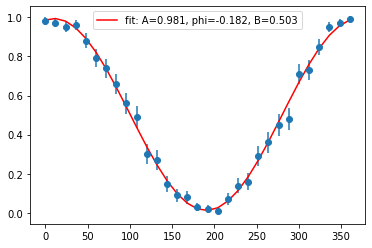

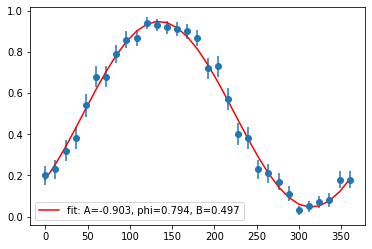

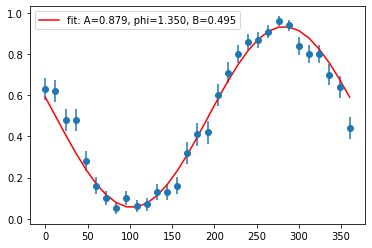

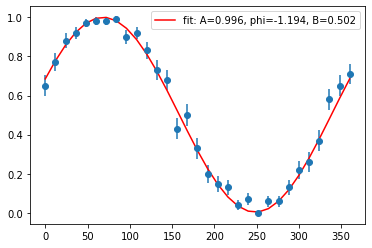

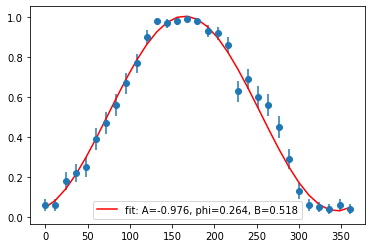

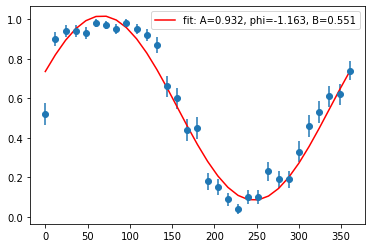

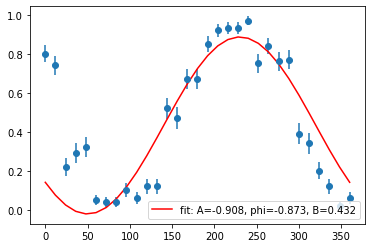

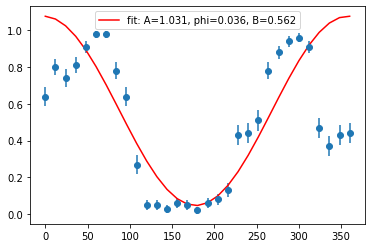

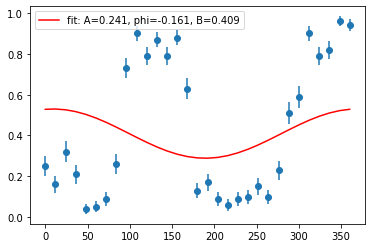

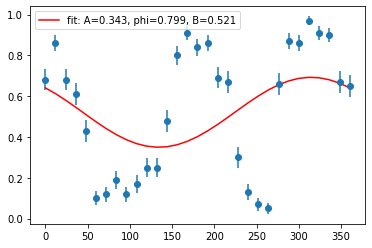

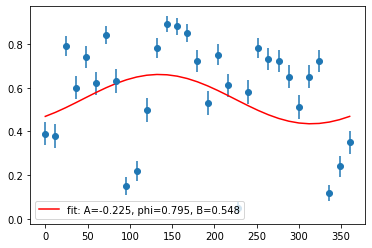

In [38]:
Contrast_closed = []
Contrast_err_closed = []
for i in range(len(df_closed)):
    xdata, ydata = readFile(df_closed['filename'][i])
    guess = np.array([1, 0.01, 0.5])
    popt, pcov = curve_fit(Ramsey_phase_scan, xdata, ydata, guess, sigma=np.sqrt(ydata*(1-ydata)/100)+0.005)
    plt.plot(xdata, Ramsey_phase_scan(xdata, *popt), 'r-',
         label='fit: A=%5.3f, phi=%5.3f, B=%5.3f' % tuple(popt))
    plt.errorbar(xdata, ydata, yerr=np.sqrt(ydata*(1-ydata)/100)+0.005 ,ls='',marker='o')
    plt.legend()
    plt.show()
    Contrast_closed.append(abs(popt[0]))
    Contrast_err_closed.append(np.sqrt(np.diag(pcov)[0]))

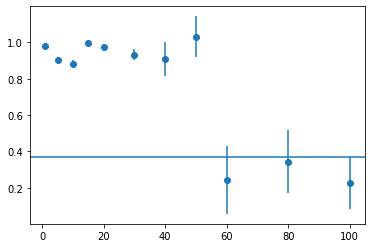

In [39]:
wait_time_closed = [float(df_closed['wait time (ms)'][i]) for i in range(len(df_closed))]
plt.errorbar(wait_time_closed, Contrast_closed, yerr=Contrast_err_closed, ls='',marker='o')
plt.axhline(y = 1/np.exp(1))

The phase of the last several 'shield closed' data are wired. Looks like extra Stark shift exists. So I'll try to include the Stark shift effect

In [46]:
def Ramsey_phase_scan_with_SS(theta, A, phi, B, w):
    theta_radian = theta/180*np.pi
    return A*np.cos(theta_radian*w+phi)/2+B

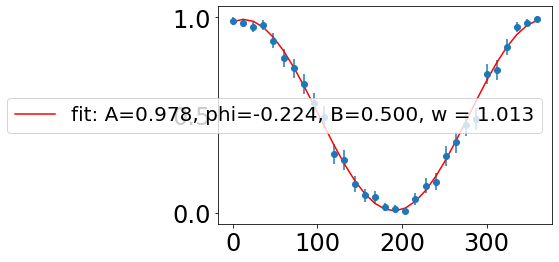

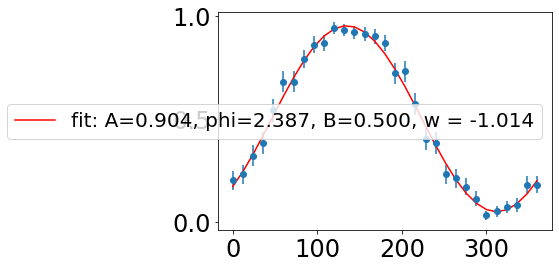

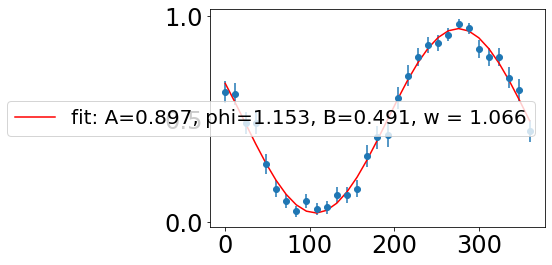

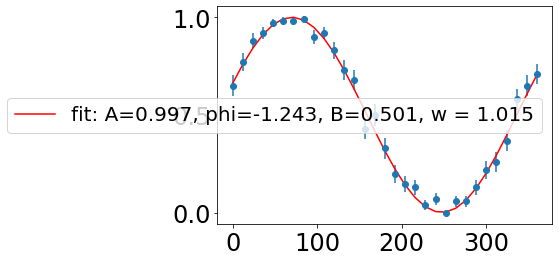

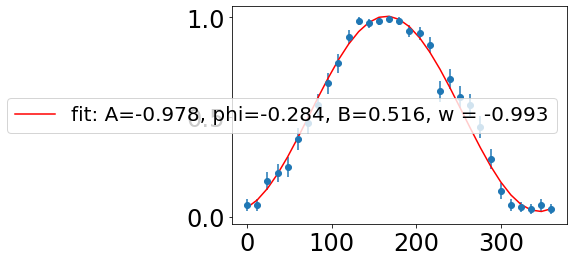

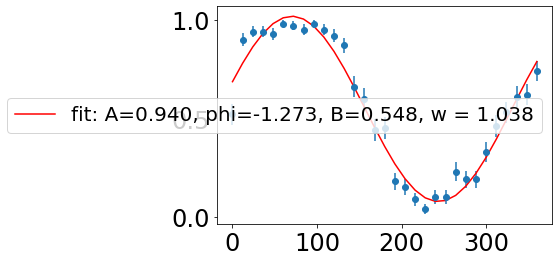

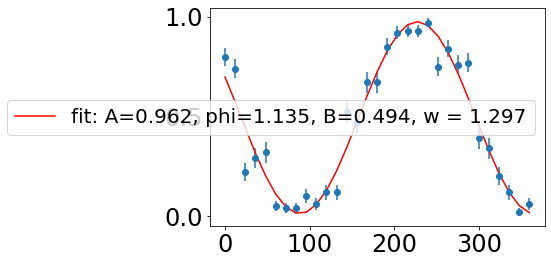

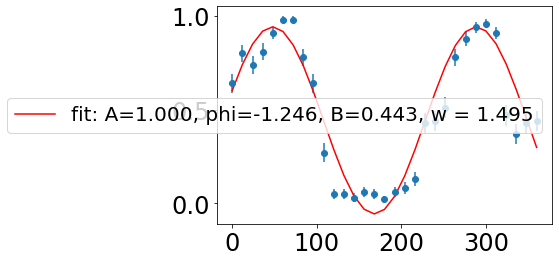

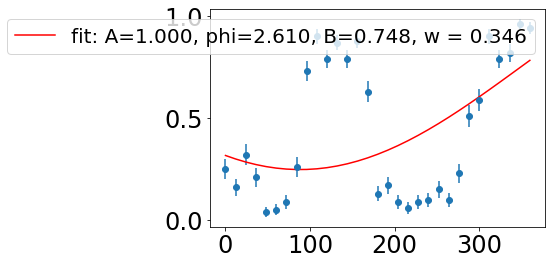

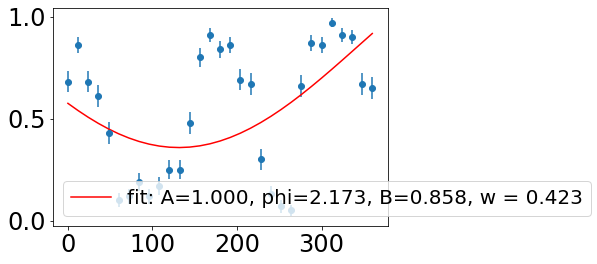

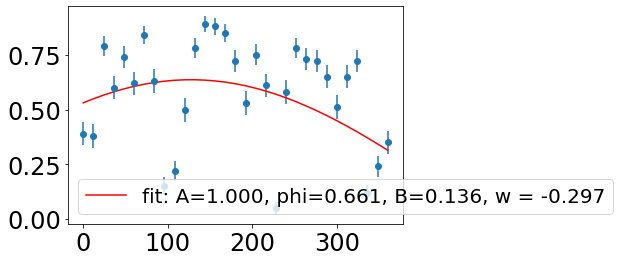

In [47]:
Contrast_closed = []
Contrast_err_closed = []
for i in range(len(df_closed)):
    xdata, ydata = readFile(df_closed['filename'][i])
    guess = np.array([1, 0.01, 0.5, 1])
    popt, pcov = curve_fit(Ramsey_phase_scan_with_SS, xdata, ydata, guess, 
                           sigma=np.sqrt(ydata*(1-ydata)/100)+0.005,
                          bounds=((-1.0,-np.inf, -np.inf, -np.inf), (1.0, np.inf,np.inf,np.inf)))
    plt.plot(xdata, Ramsey_phase_scan_with_SS(xdata, *popt), 'r-',
         label='fit: A=%5.3f, phi=%5.3f, B=%5.3f, w = %5.3f' % tuple(popt))
    plt.errorbar(xdata, ydata, yerr=np.sqrt(ydata*(1-ydata)/100)+0.005 ,ls='',marker='o')
    plt.legend()
    plt.show()
    Contrast_closed.append(abs(popt[0]))
    Contrast_err_closed.append(np.sqrt(np.diag(pcov)[0]))

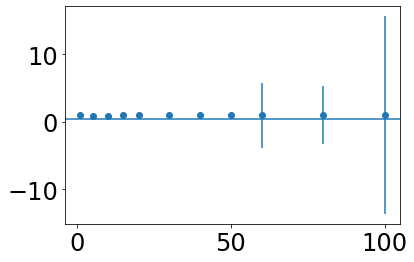

In [48]:
wait_time_closed = [float(df_closed['wait time (ms)'][i]) for i in range(len(df_closed))]
plt.errorbar(wait_time_closed, Contrast_closed, yerr=Contrast_err_closed, ls='',marker='o')
plt.axhline(y = 1/np.exp(1))

All right, the auto fitting does not heelp... I'll try to manually set the guess value

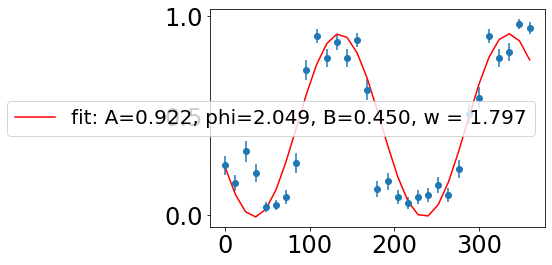

In [50]:
xdata, ydata = readFile(df_closed['filename'][8])
guess = np.array([1, 0.01, 0.5, 2])
popt, pcov = curve_fit(Ramsey_phase_scan_with_SS, xdata, ydata, guess, 
                       sigma=np.sqrt(ydata*(1-ydata)/100)+0.005,
                      bounds=((-1.0,-np.inf, -np.inf, -np.inf), (1.0, np.inf,np.inf,np.inf)))
plt.plot(xdata, Ramsey_phase_scan_with_SS(xdata, *popt), 'r-',
     label='fit: A=%5.3f, phi=%5.3f, B=%5.3f, w = %5.3f' % tuple(popt))
plt.errorbar(xdata, ydata, yerr=np.sqrt(ydata*(1-ydata)/100)+0.005 ,ls='',marker='o')
plt.legend()
plt.show()
Contrast_closed[8] = abs(popt[0])
Contrast_err_closed[8] = np.sqrt(np.diag(pcov)[0])

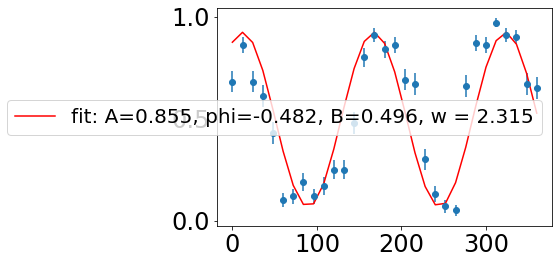

In [51]:
xdata, ydata = readFile(df_closed['filename'][9])
guess = np.array([1, 0.01, 0.5, 2.3])
popt, pcov = curve_fit(Ramsey_phase_scan_with_SS, xdata, ydata, guess, 
                       sigma=np.sqrt(ydata*(1-ydata)/100)+0.005,
                      bounds=((-1.1,-np.inf, -np.inf, -np.inf), (1.1, np.inf,np.inf,np.inf)))
plt.plot(xdata, Ramsey_phase_scan_with_SS(xdata, *popt), 'r-',
     label='fit: A=%5.3f, phi=%5.3f, B=%5.3f, w = %5.3f' % tuple(popt))
plt.errorbar(xdata, ydata, yerr=np.sqrt(ydata*(1-ydata)/100)+0.005 ,ls='',marker='o')
plt.legend()
plt.show()
Contrast_closed[9] = abs(popt[0])
Contrast_err_closed[9] = np.sqrt(np.diag(pcov)[0])

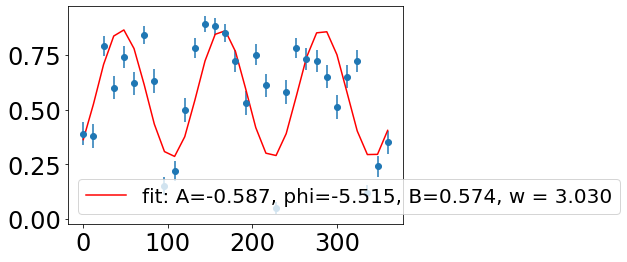

In [52]:
xdata, ydata = readFile(df_closed['filename'][10])
guess = np.array([1, 0.01, 0.5, 3])
popt, pcov = curve_fit(Ramsey_phase_scan_with_SS, xdata, ydata, guess, 
                       sigma=np.sqrt(ydata*(1-ydata)/100)+0.005,
                      bounds=((-1.1,-np.inf, -np.inf, -np.inf), (1.1, np.inf,np.inf,np.inf)))
plt.plot(xdata, Ramsey_phase_scan_with_SS(xdata, *popt), 'r-',
     label='fit: A=%5.3f, phi=%5.3f, B=%5.3f, w = %5.3f' % tuple(popt))
plt.errorbar(xdata, ydata, yerr=np.sqrt(ydata*(1-ydata)/100)+0.005 ,ls='',marker='o')
plt.legend()
plt.show()
Contrast_closed[10] = abs(popt[0])
Contrast_err_closed[10] = np.sqrt(np.diag(pcov)[0])

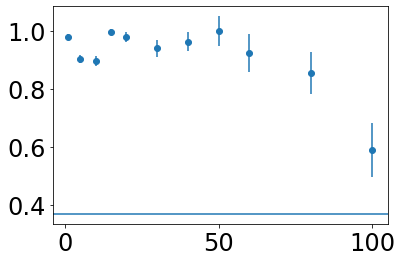

In [53]:
wait_time_closed = [float(df_closed['wait time (ms)'][i]) for i in range(len(df_closed))]
plt.errorbar(wait_time_closed, Contrast_closed, yerr=Contrast_err_closed, ls='',marker='o')
plt.axhline(y = 1/np.exp(1))

In [54]:
SMALL_SIZE = 24
MEDIUM_SIZE = 28
BIGGER_SIZE = 32

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

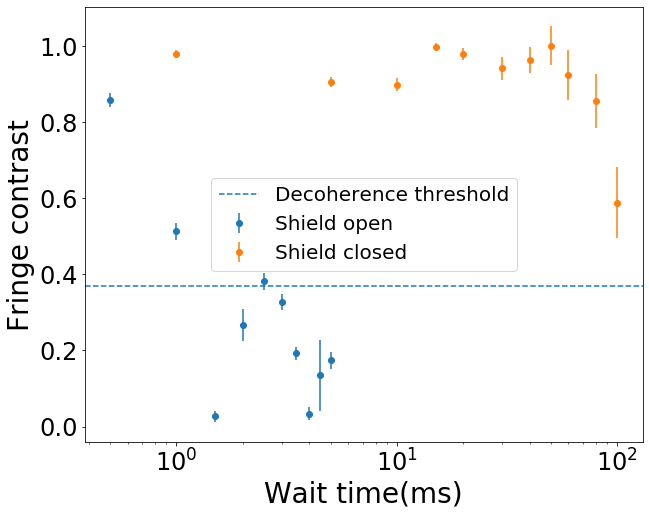

In [55]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1, 1, 1)

ax.errorbar(wait_time_open, Contrast_open, yerr=Contrast_err_open, ls='',marker='o',label = 'Shield open')
ax.errorbar(wait_time_closed, Contrast_closed, yerr=Contrast_err_closed, ls='',marker='o',label = 'Shield closed')
ax.axhline(y = 1/np.exp(1), ls = '--', label = 'Decoherence threshold')
ax.set_xlabel('Wait time(ms)')
ax.set_ylabel('Fringe contrast')
ax.set_xscale('log')
ax.legend()

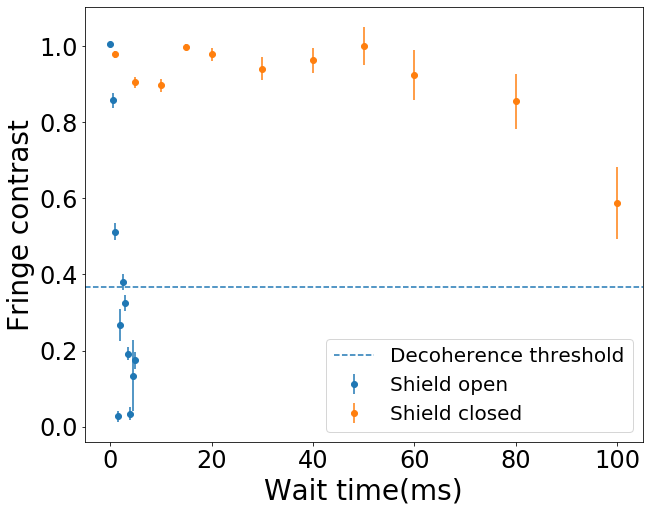

In [56]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1, 1, 1)

ax.errorbar(wait_time_open, Contrast_open, yerr=Contrast_err_open, ls='',marker='o',label = 'Shield open')
ax.errorbar(wait_time_closed, Contrast_closed, yerr=Contrast_err_closed, ls='',marker='o',label = 'Shield closed')
ax.axhline(y = 1/np.exp(1), ls = '--', label = 'Decoherence threshold')
ax.set_xlabel('Wait time(ms)')
ax.set_ylabel('Fringe contrast')
ax.set_xscale('linear')
ax.legend()

In [61]:
def Gaussian(x, sigma):
    y = np.exp(-x**2/sigma**2)
    return y

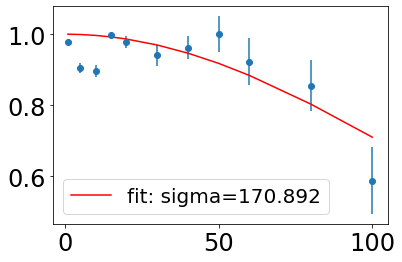

In [64]:
guess2 = [100]
xdata2 = np.array(wait_time_closed)
ydata2 = np.array(Contrast_closed)
err2 = Contrast_err_closed
popt2, pcov2 = curve_fit(Gaussian, xdata2, ydata2, guess2, 
                       sigma=err2)
plt.plot(xdata2, Gaussian(xdata2, *popt2), 'r-',
     label='fit: sigma=%5.3f' % tuple(popt2))
plt.errorbar(xdata2, ydata2, yerr=err2 ,ls='',marker='o')
plt.legend()
plt.show()

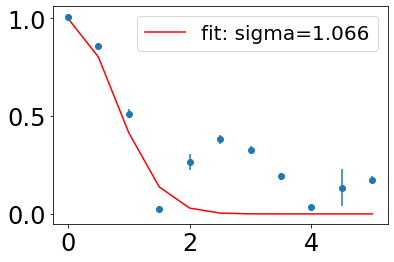

In [65]:
guess1 = [5]
xdata1 = np.array(wait_time_open)
ydata1 = np.array(Contrast_open)
err = Contrast_err_open
popt1, pcov1 = curve_fit(Gaussian, xdata1, ydata1, guess1, 
                       sigma=err)
plt.plot(xdata1, Gaussian(xdata1, *popt1), 'r-',
     label='fit: sigma=%5.3f' % tuple(popt1))
plt.errorbar(xdata1, ydata1, yerr=err ,ls='',marker='o')
plt.legend()
plt.show()

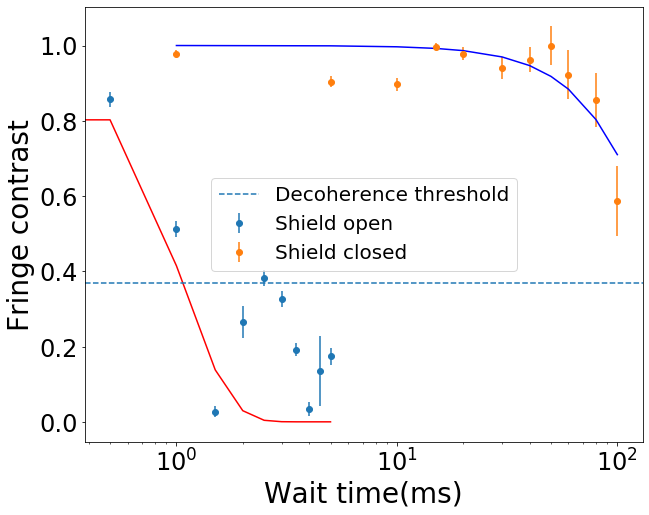

In [66]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1, 1, 1)

ax.plot(xdata1, Gaussian(xdata1, *popt1), 'r-')
ax.plot(xdata2, Gaussian(xdata2, *popt2), 'b-')
ax.errorbar(wait_time_open, Contrast_open, yerr=Contrast_err_open, ls='',marker='o',label = 'Shield open')
ax.errorbar(wait_time_closed, Contrast_closed, yerr=Contrast_err_closed, ls='',marker='o',label = 'Shield closed')
ax.axhline(y = 1/np.exp(1), ls = '--', label = 'Decoherence threshold')
ax.set_xlabel('Wait time(ms)')
ax.set_ylabel('Fringe contrast')
ax.set_xscale('log')
ax.legend()

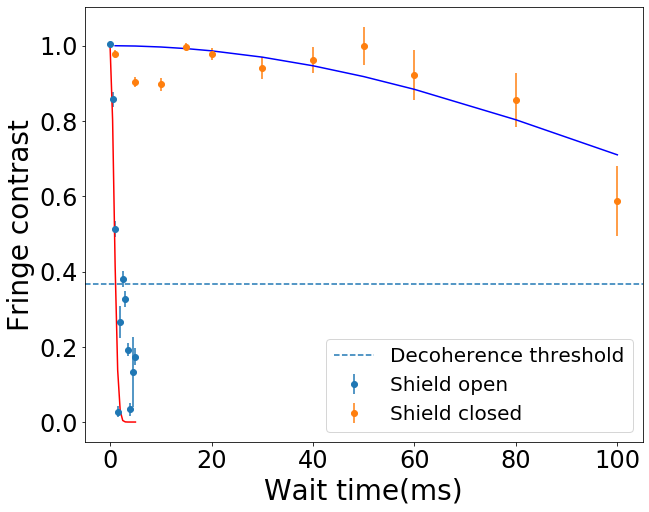

In [67]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1, 1, 1)

ax.plot(xdata1, Gaussian(xdata1, *popt1), 'r-')
ax.plot(xdata2, Gaussian(xdata2, *popt2), 'b-')
ax.errorbar(wait_time_open, Contrast_open, yerr=Contrast_err_open, ls='',marker='o',label = 'Shield open')
ax.errorbar(wait_time_closed, Contrast_closed, yerr=Contrast_err_closed, ls='',marker='o',label = 'Shield closed')
ax.axhline(y = 1/np.exp(1), ls = '--', label = 'Decoherence threshold')
ax.set_xlabel('Wait time(ms)')
ax.set_ylabel('Fringe contrast')
ax.set_xscale('linear')
ax.legend()